In [1]:
import pandas as pd
import os, sys
import glob

In [2]:
output_dir = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/FINAL_RESULTS/without_sanity_check"

In [3]:
sample_raw = "2023-11-09-HW3YVAFX5/LanexHGSVCpool2NEW"

In [4]:
# Parameters
sample_raw = "2021-08-03-H22VWAFX3/HGSVCxpool2x02"


In [5]:


l_samples = [
# "2021-07-29-HWYJ2AFX2/HGSVCxpool1x01",
# "2021-08-03-H22VWAFX3/HGSVCxpool2x02",
# "2021-08-03-H22VWAFX3/HGSVCxpool3x01",
# "2023-11-09-HW5NFAFX5/HGSVCpool1NEW",
# "2023-11-09-HW3YVAFX5/LanexHGSVCpool2NEW",
# "2024-01-29-H33YJAFX7/LanexHGSVCpool2NEW96wellUVLED"
#"2024-01-30-AACT75KM5/HGSVCpool1NEWp2"
 #"2024-01-30-AACT75KM5/HGSVCpool3NEWp2"
  sample_raw  
]

sample = l_samples[0].split("/")[-1]
sample_for_savedir = l_samples[0].replace("/", "--")
sample_for_savedir_lite = sample_for_savedir.split("--")[1]

print(sample_for_savedir)

#l_samples = [
#"2021-08-03-H22VWAFX3/HGSVCxpool3x01"
#"2021-08-03-H22VWAFX3/HGSVCxpool3x01"
#"2021-07-29-HWYJ2AFX2/HGSVCxpool1x01"
#"2023-11-09-HW3YVAFX5/LanexHGSVCpool2NEW"
#"2023-11-09-HW5NFAFX5/HGSVCpool1NEW"
#"2021-05-12-HMCNFAFX2/GM18989x01",
#"2021-04-21-HMNJLAFX2/GM19320x01",
#"2021-05-12-HMCNFAFX2/GM19331x01",
#"2021-05-31-HNLFLAFX2/GM19836x01",
#"2021-05-31-HNLFLAFX2/GM20355x01",
#"2021-05-06-HN2VJAFX2/GM21487x01",
#"2021-04-21-HMNJLAFX2/HG02282x03",
#"2021-05-06-HN2VJAFX2/HG02554x01",
#"2021-05-31-HNLFLAFX2/HG02666x02",
#"2021-04-21-HMNJLAFX2/HG02769x01",
#"2021-05-06-HN2VJAFX2/HG02953x01",
#"2021-05-12-HMCNFAFX2/HG03452x02",
#]

year = list(set([e.split("-")[0] for e in l_samples]))[0]
#index = "PE20" if year == "2021" or year == "2022" else "iTRU"
os.makedirs(f"{output_dir}/{sample_for_savedir}", exist_ok=True)

2021-08-03-H22VWAFX3--HGSVCxpool2x02


In [6]:
# Glob pattern to find .vcf files for the given sample
vcf_files = glob.glob(f"/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/{sample}/*.vcf")

# Initialize the index variable
index = None

# Check if the list of files is not empty
if vcf_files:
    # Retrieve the first file in the list
    first_file = vcf_files[0]
    
    # Check if "PE20" or "iTRU" is in the filename of the first file
    if "PE20" in first_file:
        index = "PE20"
    elif "iTRU" in first_file:
        index = "iTRU"

# Print the index value or a message if no index was found
if index:
    print(f"Index found: {index}")
else:
    print("No PE20 or iTRU index found in the first file.")

Index found: PE20


In [7]:
ref_path = f"/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/{sample}/merge.txt.gz"
#ref_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/HGSVCxpool3x01/merge.txt.gz"
# ref_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/PSEUDOPOOL/merge.txt.gz"
ref = pd.read_csv(ref_path, compression="gzip", sep="\t",)
ref["GlobalSample"] = ref_path.split("/")[-2]

if "with_sanity_check" in output_dir:

    sanity_check_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/Random_for_sanity_check/merge.txt.gz"
    sanity_check_ref = pd.read_csv(sanity_check_path, compression="gzip", sep="\t")
    sanity_check_ref["GlobalSample"] = sanity_check_path.split("/")[-2]

    ref = pd.concat([ref, sanity_check_ref])

ref["ID"] = "chr" + ref["ID"]
ref

,ID,AC,AF,SAMPLE,GlobalSample
0,chr10:12786:T:C,50,0.007808,NA19094,HGSVCxpool2x02
1,chr10:16075:A:T,7,0.001093,NA19094,HGSVCxpool2x02
2,chr10:18705:T:G,273,0.042630,NA19094,HGSVCxpool2x02
3,chr10:37358:A:G,59,0.009213,NA19094,HGSVCxpool2x02
4,chr10:37367:T:A,8,0.001249,NA19094,HGSVCxpool2x02
...,...,...,...,...,...
16873379,chrX:155987481:G:T,6,0.000937,NA20507,HGSVCxpool2x02
16873380,chrX:156009352:C:T,17,0.002655,NA20507,HGSVCxpool2x02
16873381,chrX:156021873:C:T,296,0.046221,NA20507,HGSVCxpool2x02
16873382,chrX:156022661:G:A,192,0.029981,NA20507,HGSVCxpool2x02


In [8]:
ref['unique_sample_count'] = ref.groupby('ID')['SAMPLE'].transform('nunique')
ref = ref[ref['unique_sample_count'] == 1]
#ref

In [9]:
ref

,ID,AC,AF,SAMPLE,GlobalSample,unique_sample_count
1,chr10:16075:A:T,7,0.001093,NA19094,HGSVCxpool2x02,1
6,chr10:47990:C:G,200,0.031231,NA19094,HGSVCxpool2x02,1
7,chr10:48659:G:A,14,0.002186,NA19094,HGSVCxpool2x02,1
12,chr10:63339:G:A,16,0.002498,NA19094,HGSVCxpool2x02,1
20,chr10:86506:C:A,16,0.002498,NA19094,HGSVCxpool2x02,1
...,...,...,...,...,...,...
16873375,chrX:155940762:C:T,13,0.002030,NA20507,HGSVCxpool2x02,1
16873376,chrX:155954518:C:T,13,0.002030,NA20507,HGSVCxpool2x02,1
16873378,chrX:155987067:C:T,8,0.001249,NA20507,HGSVCxpool2x02,1
16873379,chrX:155987481:G:T,6,0.000937,NA20507,HGSVCxpool2x02,1


In [10]:
ref.groupby(["GlobalSample", "SAMPLE"])["ID"].count()


GlobalSample    SAMPLE 
HGSVCxpool2x02  HG00155     86286
                HG00186     89580
                HG00267     88150
                HG00423    104457
                HG00480     98224
                HG00844     85887
                HG01031     85296
                HG01243    205662
                HG01276    104945
                HG01609     99490
                HG01616    105280
                HG01884    276108
                HG01928     75314
                HG02055    243330
                HG02068    106712
                HG02132    101946
                HG02148     81471
                HG02625    263891
                HG02698    115019
                HG02723    284771
                HG02975    254589
                HG03056    296123
                HG03519    250618
                HG03576    311444
                HG03816    124572
                HG03866    111556
                HG04199    123483
                HG04204    122503
                NA10837 

In [11]:
ref_count = ref.groupby(["GlobalSample", "SAMPLE"])["ID"].count().reset_index()
ref_count.to_csv(f"{output_dir}/{sample_for_savedir}/reference_file_SNP_counts.tsv", sep="\t")
ref_count.head()


,GlobalSample,SAMPLE,ID
0,HGSVCxpool2x02,HG00155,86286
1,HGSVCxpool2x02,HG00186,89580
2,HGSVCxpool2x02,HG00267,88150
3,HGSVCxpool2x02,HG00423,104457
4,HGSVCxpool2x02,HG00480,98224


In [12]:
#sanity_check_ref.SAMPLE.unique()

In [13]:
import glob
final_vcf = list()
for vcf_input in glob.glob(f"/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/{sample}/*.vcf"):
    cell_line = vcf_input.split("/")[-1].split("_")[0].replace(".vcf", "")
    vcf = pd.read_csv(vcf_input, skiprows=255, sep="\t")

    vcf["cell_line"] = cell_line
#    print(vcf)
    vcf["ID"] = vcf["#CHROM"] + ":" + vcf["POS"].astype(str) + ":" + vcf["REF"]+ ":"  + vcf["ALT"]
#    print(vcf_input)
#    print(cell_line.split(f"{index}")[0])
    vcf = vcf.drop([cell_line.split(f"{index}")[0]], axis=1)
#    vcf = vcf.drop(["HGSVCpool2iTRUE5"], axis=1)

#    print(vcf)
    final_vcf.append(vcf)
final_vcf = pd.concat(final_vcf)
final_vcf.to_csv(f"{output_dir}/{sample_for_savedir}/full_set_of_SNPs_called.tsv.gz", sep="\t", compression="gzip")

final_vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line
0,chr1,4150104,chr1:4150104:C:T,C,T,97.012700,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=4;CIGAR=1X;DP=4;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385
1,chr1,19237406,chr1:19237406:T:G,T,G,73.659700,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=3;CIGAR=1X;DP=3;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385
2,chr1,26445967,chr1:26445967:G:T,G,T,49.691900,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385
3,chr1,27389709,chr1:27389709:C:T,C,T,76.681100,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=5;CIGAR=1X;DP=5;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385
4,chr1,61688712,chr1:61688712:G:C,G,C,9.109520,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385
...,...,...,...,...,...,...,...,...,...,...
9347,chrUn_GL000216v2,173957,chrUn_GL000216v2:173957:A:G,A,G,0.053300,.,AB=0.5;ABP=3.0103;AC=1;AF=0.5;AN=2;AO=4;CIGAR=...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20352
9348,chrUn_GL000216v2,174386,chrUn_GL000216v2:174386:A:G,A,G,0.104221,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20352
9349,chrUn_GL000216v2,174402,chrUn_GL000216v2:174402:T:C,T,C,0.104221,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20352
9350,chrUn_GL000216v2,174429,chrUn_GL000216v2:174429:C:G,C,G,0.104221,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20352


In [14]:
final_vcf['unique_sample_count'] = final_vcf.groupby('ID')['cell_line'].transform('nunique')
#final_vcf = final_vcf[final_vcf['unique_sample_count'] == 1]
final_vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line,unique_sample_count
0,chr1,4150104,chr1:4150104:C:T,C,T,97.012700,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=4;CIGAR=1X;DP=4;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385,1
1,chr1,19237406,chr1:19237406:T:G,T,G,73.659700,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=3;CIGAR=1X;DP=3;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385,1
2,chr1,26445967,chr1:26445967:G:T,G,T,49.691900,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385,2
3,chr1,27389709,chr1:27389709:C:T,C,T,76.681100,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=5;CIGAR=1X;DP=5;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385,1
4,chr1,61688712,chr1:61688712:G:C,G,C,9.109520,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385,1
...,...,...,...,...,...,...,...,...,...,...,...
9347,chrUn_GL000216v2,173957,chrUn_GL000216v2:173957:A:G,A,G,0.053300,.,AB=0.5;ABP=3.0103;AC=1;AF=0.5;AN=2;AO=4;CIGAR=...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20352,28
9348,chrUn_GL000216v2,174386,chrUn_GL000216v2:174386:A:G,A,G,0.104221,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20352,3
9349,chrUn_GL000216v2,174402,chrUn_GL000216v2:174402:T:C,T,C,0.104221,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20352,7
9350,chrUn_GL000216v2,174429,chrUn_GL000216v2:174429:C:G,C,G,0.104221,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20352,6


In [15]:
final_vcf.cell_line.nunique()

96

In [16]:
merge_df = pd.merge(final_vcf, ref, on="ID", how="inner")
merge_df.to_csv(f"{output_dir}/{sample_for_savedir}/join_ref_to_SNPs_called.tsv.gz", sep="\t", compression="gzip")
merge_df.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,cell_line,unique_sample_count_x,AC,AF,SAMPLE,GlobalSample,unique_sample_count_y
0,chr3,165172224,chr3:165172224:T:C,T,C,50.3082,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385,1,2,0.000312,HG03576,HGSVCxpool2x02,1
1,chr4,99232601,chr4:99232601:C:T,C,T,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385,2,52,0.008120,NA20129,HGSVCxpool2x02,1
2,chr7,53613587,chr7:53613587:C:T,C,T,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385,2,53,0.008276,HG03519,HGSVCxpool2x02,1
3,chr7,82368410,chr7:82368410:G:C,G,C,52.5386,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385,1,37,0.005778,HG03576,HGSVCxpool2x02,1
4,chr7,116762069,chr7:116762069:A:C,A,C,56.3287,.,AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...,GT:DP:AD:RO:QR:AO:QA,HGSVCxpool2x02PE20385,1,133,0.020768,HG02055,HGSVCxpool2x02,1


In [17]:
merge_df.cell_line.nunique()

87

In [18]:


pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
mosaicatcher_stats = pd.concat([pd.read_csv("/scratch/tweber/DATA/MC_DATA/STOCKS/{}/counts/{}.info_raw".format(sample, sample.split("/")[-1]), sep="\t", skiprows=13) for sample in l_samples])
mosaicatcher_stats["cell"] = mosaicatcher_stats["cell"].str.replace(".sort.mdup.bam", "")
mosaicatcher_stats.head()

,sample,cell,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,HGSVCxpool2x02,HGSVCxpool2x02PE20301,4,383491,130,220196,19442,71670,72053,1,0.0697,0.372636,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
1,HGSVCxpool2x02,HGSVCxpool2x02PE20302,21,1977033,1349,1224971,119674,314524,316515,1,0.0697,1.627260,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
2,HGSVCxpool2x02,HGSVCxpool2x02PE20303,7,690007,302,420210,33716,117458,118321,1,0.0697,0.612760,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
3,HGSVCxpool2x02,HGSVCxpool2x02PE20304,19,1725788,801,1068702,91867,281302,283116,1,0.0697,1.460790,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
4,HGSVCxpool2x02,HGSVCxpool2x02PE20305,0,44178,24,27298,1895,7468,7493,0,0.0000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...


In [19]:


pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
ashleys_labels = pd.concat([pd.read_csv(f"/scratch/tweber/DATA/MC_DATA/STOCKS/{sample}/cell_selection/labels.tsv", sep="\t") for sample in l_samples])
ashleys_labels["cell"] = ashleys_labels["cell"].str.replace(".sort.mdup.bam", "")
ashleys_labels.head()

,cell,prediction,probability,sample
0,HGSVCxpool2x02PE20301,0,0.0240,HGSVCxpool2x02
1,HGSVCxpool2x02PE20302,1,0.9122,HGSVCxpool2x02
2,HGSVCxpool2x02PE20303,1,0.6041,HGSVCxpool2x02
3,HGSVCxpool2x02PE20304,1,0.7598,HGSVCxpool2x02
4,HGSVCxpool2x02PE20305,0,0.0000,HGSVCxpool2x02


In [20]:
combine_ashleys_mc_stats = pd.merge(ashleys_labels, mosaicatcher_stats, on=["sample", "cell"], how="inner")
combine_ashleys_mc_stats.head()

,cell,prediction,probability,sample,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,HGSVCxpool2x02PE20301,0,0.0240,HGSVCxpool2x02,4,383491,130,220196,19442,71670,72053,1,0.0697,0.372636,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
1,HGSVCxpool2x02PE20302,1,0.9122,HGSVCxpool2x02,21,1977033,1349,1224971,119674,314524,316515,1,0.0697,1.627260,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
2,HGSVCxpool2x02PE20303,1,0.6041,HGSVCxpool2x02,7,690007,302,420210,33716,117458,118321,1,0.0697,0.612760,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
3,HGSVCxpool2x02PE20304,1,0.7598,HGSVCxpool2x02,19,1725788,801,1068702,91867,281302,283116,1,0.0697,1.460790,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
4,HGSVCxpool2x02PE20305,0,0.0000,HGSVCxpool2x02,0,44178,24,27298,1895,7468,7493,0,0.0000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...


In [21]:
merge_df.cell_line.nunique()

87

In [22]:
gb_sample_count = merge_df.rename({"cell_line": "cell"}, axis=1).groupby(["cell", "GlobalSample", "SAMPLE"])["ID"].count().reset_index()
gb_sample_count_stats = gb_sample_count.rename(columns={"cell_line": "cell"})
gb_sample_count_stats = pd.merge(gb_sample_count_stats, combine_ashleys_mc_stats, on=["cell"], how="inner")
gb_sample_count_stats = gb_sample_count_stats.loc[gb_sample_count_stats["prediction"] == 1]
gb_sample_count_stats["cell"] = gb_sample_count_stats["cell"].apply(lambda r: r.split(index)[1])
gb_sample_count_stats.to_csv(f"{output_dir}/{sample_for_savedir}/groupby_sample_counts_with_stats.tsv.gz", sep="\t", compression="gzip")
gb_sample_count_stats.head()

,cell,GlobalSample,SAMPLE,ID,prediction,probability,sample,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
2,302,HGSVCxpool2x02,HG00155,19,1,0.9122,HGSVCxpool2x02,21,1977033,1349,1224971,119674,314524,316515,1,0.0697,1.62726,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
3,302,HGSVCxpool2x02,HG00186,1,1,0.9122,HGSVCxpool2x02,21,1977033,1349,1224971,119674,314524,316515,1,0.0697,1.62726,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
4,302,HGSVCxpool2x02,HG00267,1,1,0.9122,HGSVCxpool2x02,21,1977033,1349,1224971,119674,314524,316515,1,0.0697,1.62726,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
5,302,HGSVCxpool2x02,NA19440,1,1,0.9122,HGSVCxpool2x02,21,1977033,1349,1224971,119674,314524,316515,1,0.0697,1.62726,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
6,303,HGSVCxpool2x02,HG03519,2,1,0.6041,HGSVCxpool2x02,7,690007,302,420210,33716,117458,118321,1,0.0697,0.61276,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...


In [23]:
gb_sample_count_stats.cell.nunique()

44

In [24]:
gb_sample_count_stats.cell.nunique()

44

In [25]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pivot_table_stats = pd.pivot_table(gb_sample_count_stats, columns=["GlobalSample", "SAMPLE"], index="cell", values="ID").fillna(0)
import scipy.stats as stats
pivot_table_stats_zscore = pivot_table_stats.apply(lambda x: stats.zscore(x), axis=1)
pivot_table_stats_zscore.to_csv(f"{output_dir}/{sample_for_savedir}/pivot_table_zscore_norm.tsv.gz", sep="\t", compression="gzip")
#pivot_table_stats_zscore.index = [e.split(index)[1] for e in pivot_table_stats_zscore.index]
pivot_table_stats_zscore.head()

GlobalSample HGSVCxpool2x02                                                    \
SAMPLE              HG00155   HG00186   HG00267   HG00423   HG00480   HG00844   
cell                                                                            
302                6.220377  0.151717  0.151717 -0.185431 -0.185431 -0.185431   
303               -0.184707 -0.184707 -0.184707 -0.184707 -0.184707 -0.184707   
304               -0.170077 -0.170077 -0.170077 -0.170077 -0.170077 -0.170077   
307               -0.022268 -0.200416 -0.200416 -0.200416 -0.200416 -0.200416   
308               -0.160128  6.244998 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                                              \
SAMPLE         HG01031   HG01243   HG01276   HG01609   HG01616   HG01884   
cell                                                                       
302          -0.185431 -0.185431 -0.185431 -0.185431 -0.185431 -0.185431   
303          -0.184707 -0.184707 -0.184707 -0.184707 -0.184707 -0.184707   
304          -0.170077 -0.170077 -0.170077 -0.170077 -0.170077 -0.170077   
307          -0.200416 -0.200416 -0.200416 -0.200416 -0.200416 -0.200416   
308          -0.160128 -0.160128 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                                              \
SAMPLE         HG01928   HG02055   HG02068   HG02132   HG02148   HG02625   
cell                                                                       
302          -0.185431 -0.185431 -0.185431 -0.185431 -0.185431 -0.185431   
303          -0.184707 -0.184707 -0.184707 -0.184707 -0.184707 -0.184707   
304          -0.170077  0.230104 -0.170077 -0.170077 -0.170077 -0.170077   
307          -0.200416 -0.200416  6.212899 -0.200416 -0.022268 -0.022268   
308          -0.160128 -0.160128 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                                              \
SAMPLE         HG02698   HG02723   HG02975   HG03056   HG03519   HG03576   
cell                                                                       
302          -0.185431 -0.185431 -0.185431 -0.185431 -0.185431 -0.185431   
303          -0.184707 -0.184707 -0.184707 -0.184707  0.307845  6.218476   
304          -0.170077 -0.170077 -0.170077 -0.170077 -0.170077 -0.170077   
307          -0.200416 -0.200416 -0.022268 -0.200416 -0.200416 -0.022268   
308          -0.160128 -0.160128 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                                              \
SAMPLE         HG03816   HG03866   HG04199   HG04204   NA10837   NA18531   
cell                                                                       
302          -0.185431 -0.185431 -0.185431 -0.185431 -0.185431 -0.185431   
303          -0.184707 -0.184707 -0.184707 -0.184707 -0.184707 -0.184707   
304          -0.170077 -0.170077 -0.170077  6.232805 -0.170077 -0.170077   
307          -0.200416 -0.200416 -0.200416 -0.200416 -0.200416 -0.200416   
308          -0.160128 -0.160128 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                                              \
SAMPLE         NA18951   NA19094   NA19173   NA19334   NA19440   NA19724   
cell                                                                       
302          -0.185431 -0.185431 -0.185431 -0.185431  0.151717 -0.185431   
303          -0.184707 -0.184707  0.061569 -0.184707 -0.184707 -0.184707   
304          -0.170077 -0.170077 -0.170077 -0.170077 -0.170077 -0.170077   
307          -0.200416 -0.200416 -0.200416 -0.200416 -0.200416 -0.200416   
308          -0.160128 -0.160128 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                          
SAMPLE         NA19902   NA20129   NA20507   NA20845  
cell                                                  
302          -0.185431 -0.185431 -0.185431 -0.185431  
303          -0.184707 -0.184707  0.061569 -0.184707  
304          -0.170077 -0.17007

<Axes: xlabel='GlobalSample-SAMPLE', ylabel='cell'>

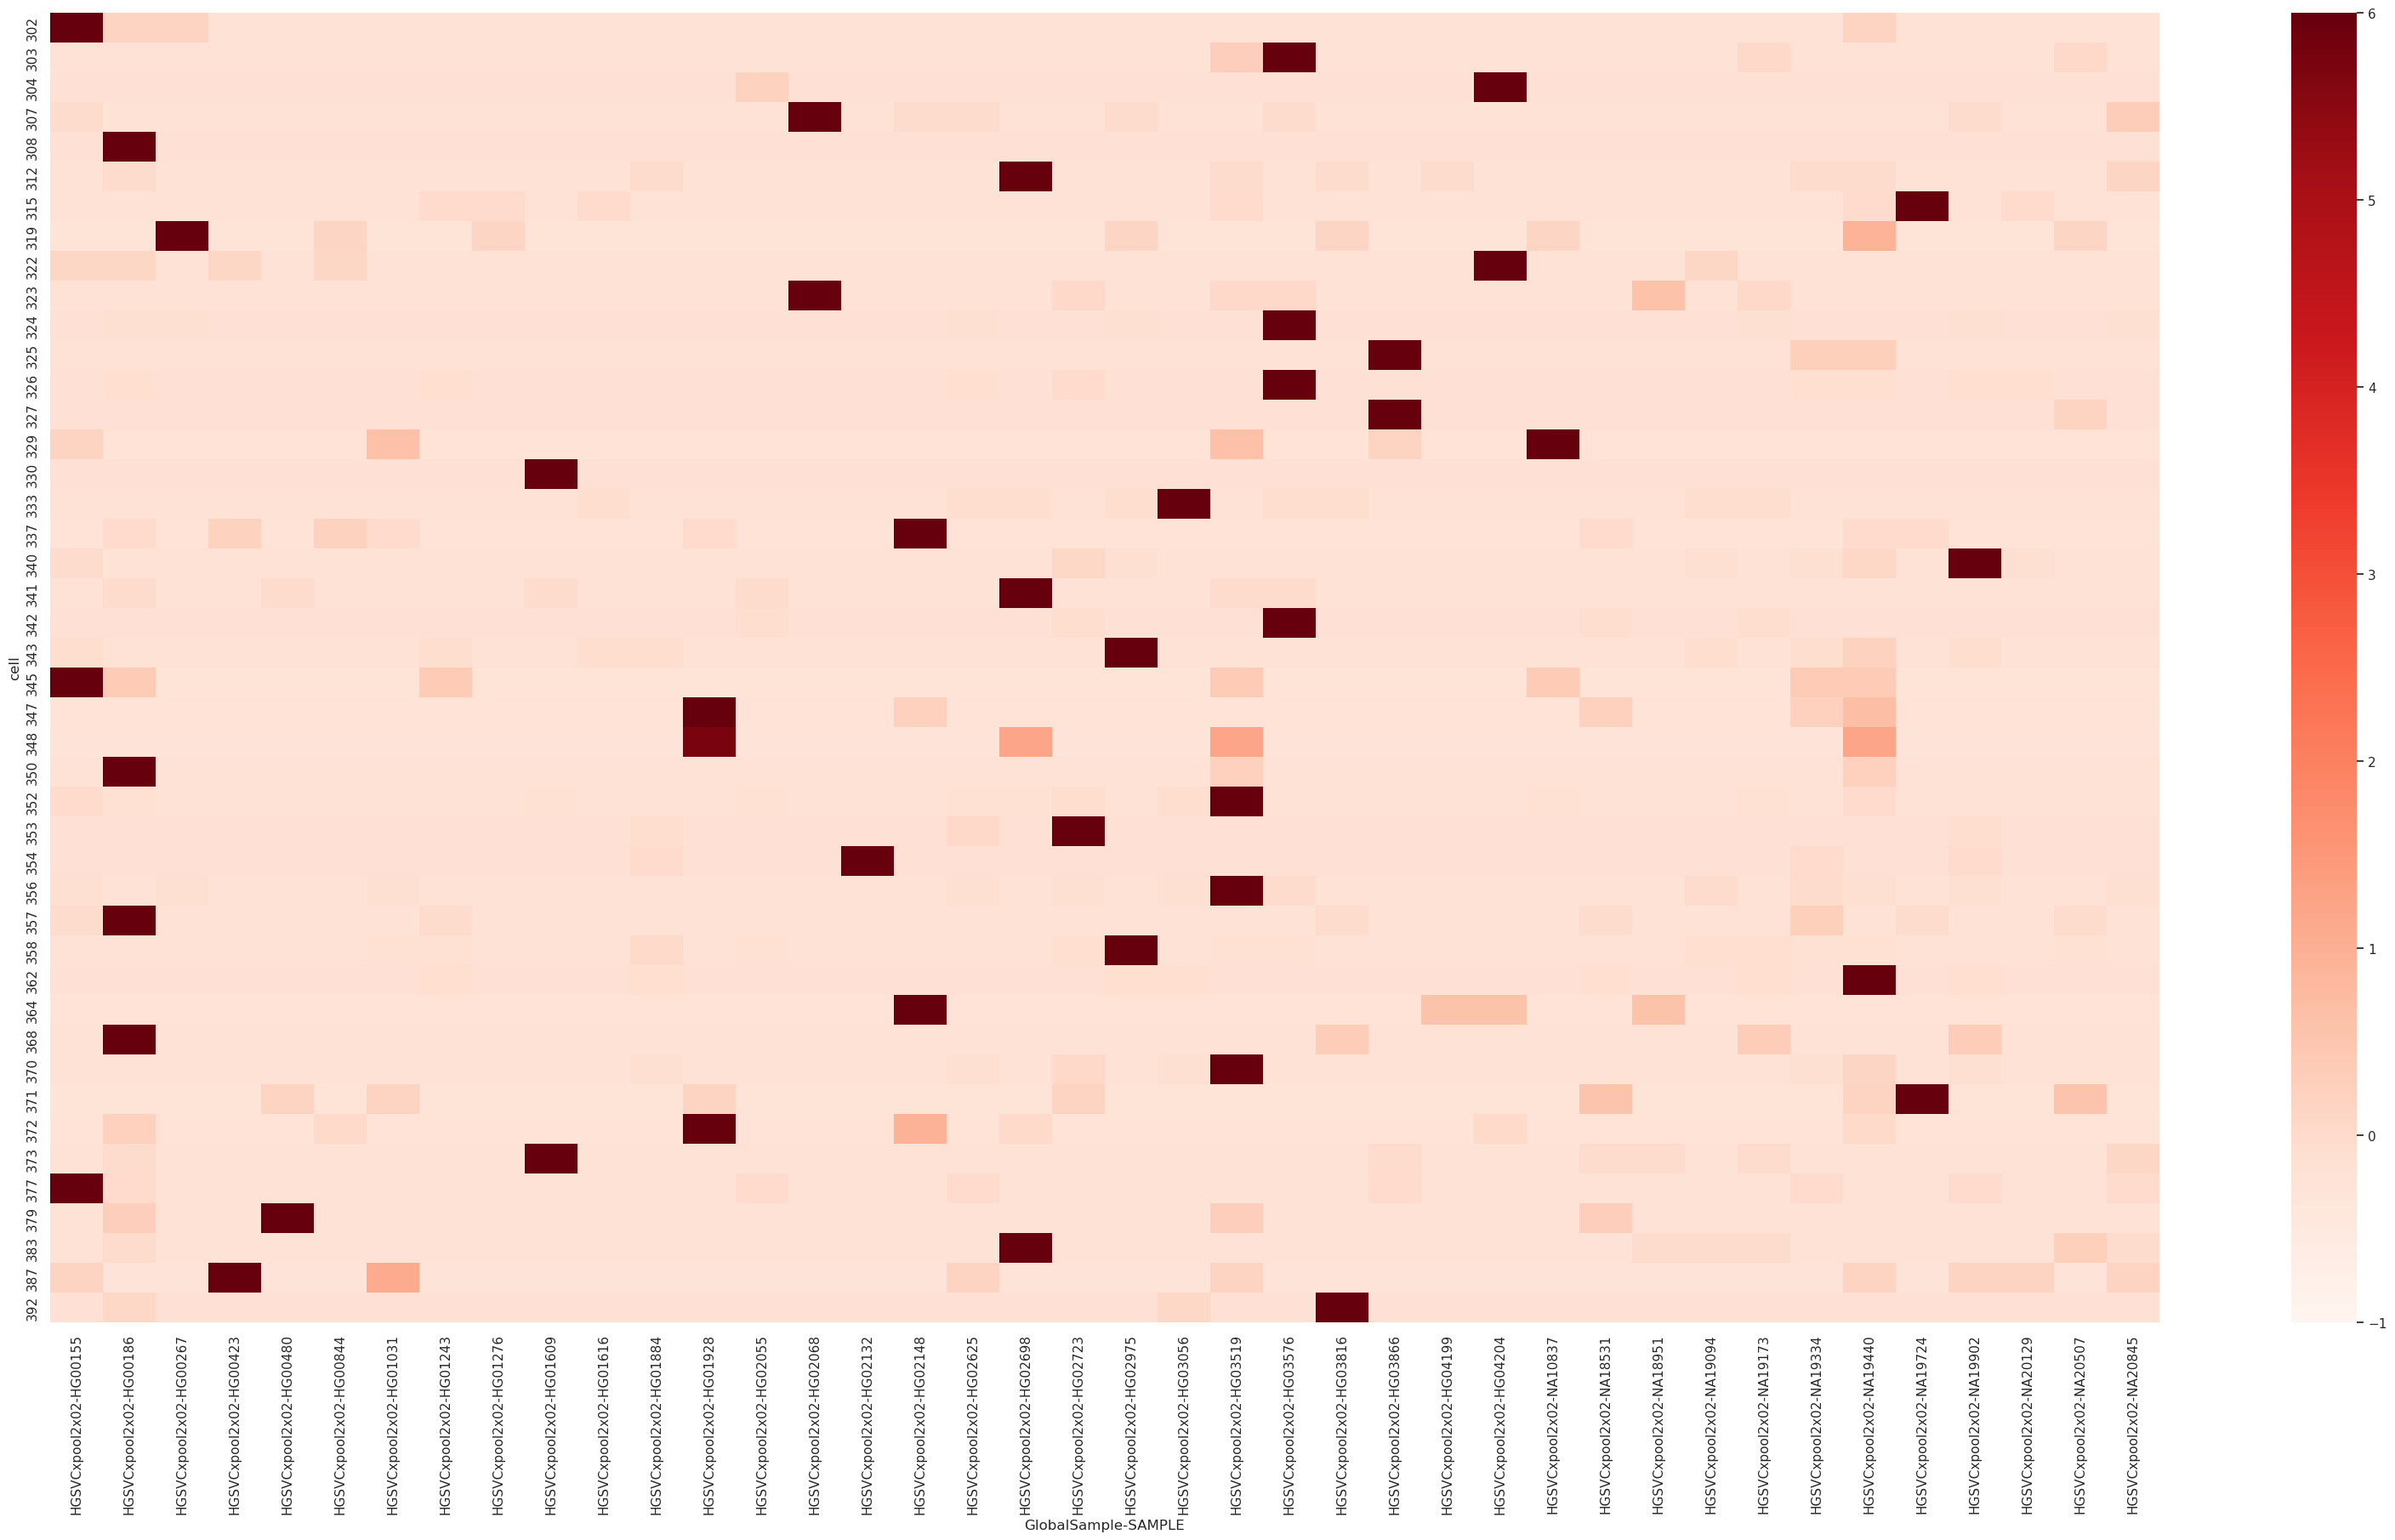

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(40,20))
ax = sns.heatmap(pivot_table_stats_zscore, cmap="Reds", vmin=-1, vmax=6)
#ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
#ax.set_xlabel("Sample")
#ax.set_ylabel("Cell Line")
ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/heatmap_zscore_cell_per_sample.png")
ax

[Text(0.5, 0, 'HGSVCxpool2x02-HG00155'), Text(1.5, 0, 'HGSVCxpool2x02-HG00186'), Text(2.5, 0, 'HGSVCxpool2x02-HG00267'), Text(3.5, 0, 'HGSVCxpool2x02-HG00423'), Text(4.5, 0, 'HGSVCxpool2x02-HG00480'), Text(5.5, 0, 'HGSVCxpool2x02-HG00844'), Text(6.5, 0, 'HGSVCxpool2x02-HG01031'), Text(7.5, 0, 'HGSVCxpool2x02-HG01243'), Text(8.5, 0, 'HGSVCxpool2x02-HG01276'), Text(9.5, 0, 'HGSVCxpool2x02-HG01609'), Text(10.5, 0, 'HGSVCxpool2x02-HG01616'), Text(11.5, 0, 'HGSVCxpool2x02-HG01884'), Text(12.5, 0, 'HGSVCxpool2x02-HG01928'), Text(13.5, 0, 'HGSVCxpool2x02-HG02055'), Text(14.5, 0, 'HGSVCxpool2x02-HG02068'), Text(15.5, 0, 'HGSVCxpool2x02-HG02132'), Text(16.5, 0, 'HGSVCxpool2x02-HG02148'), Text(17.5, 0, 'HGSVCxpool2x02-HG02625'), Text(18.5, 0, 'HGSVCxpool2x02-HG02698'), Text(19.5, 0, 'HGSVCxpool2x02-HG02723'), Text(20.5, 0, 'HGSVCxpool2x02-HG02975'), Text(21.5, 0, 'HGSVCxpool2x02-HG03056'), Text(22.5, 0, 'HGSVCxpool2x02-HG03519'), Text(23.5, 0, 'HGSVCxpool2x02-HG03576'), Text(24.5, 0, 'HGSVCxpool

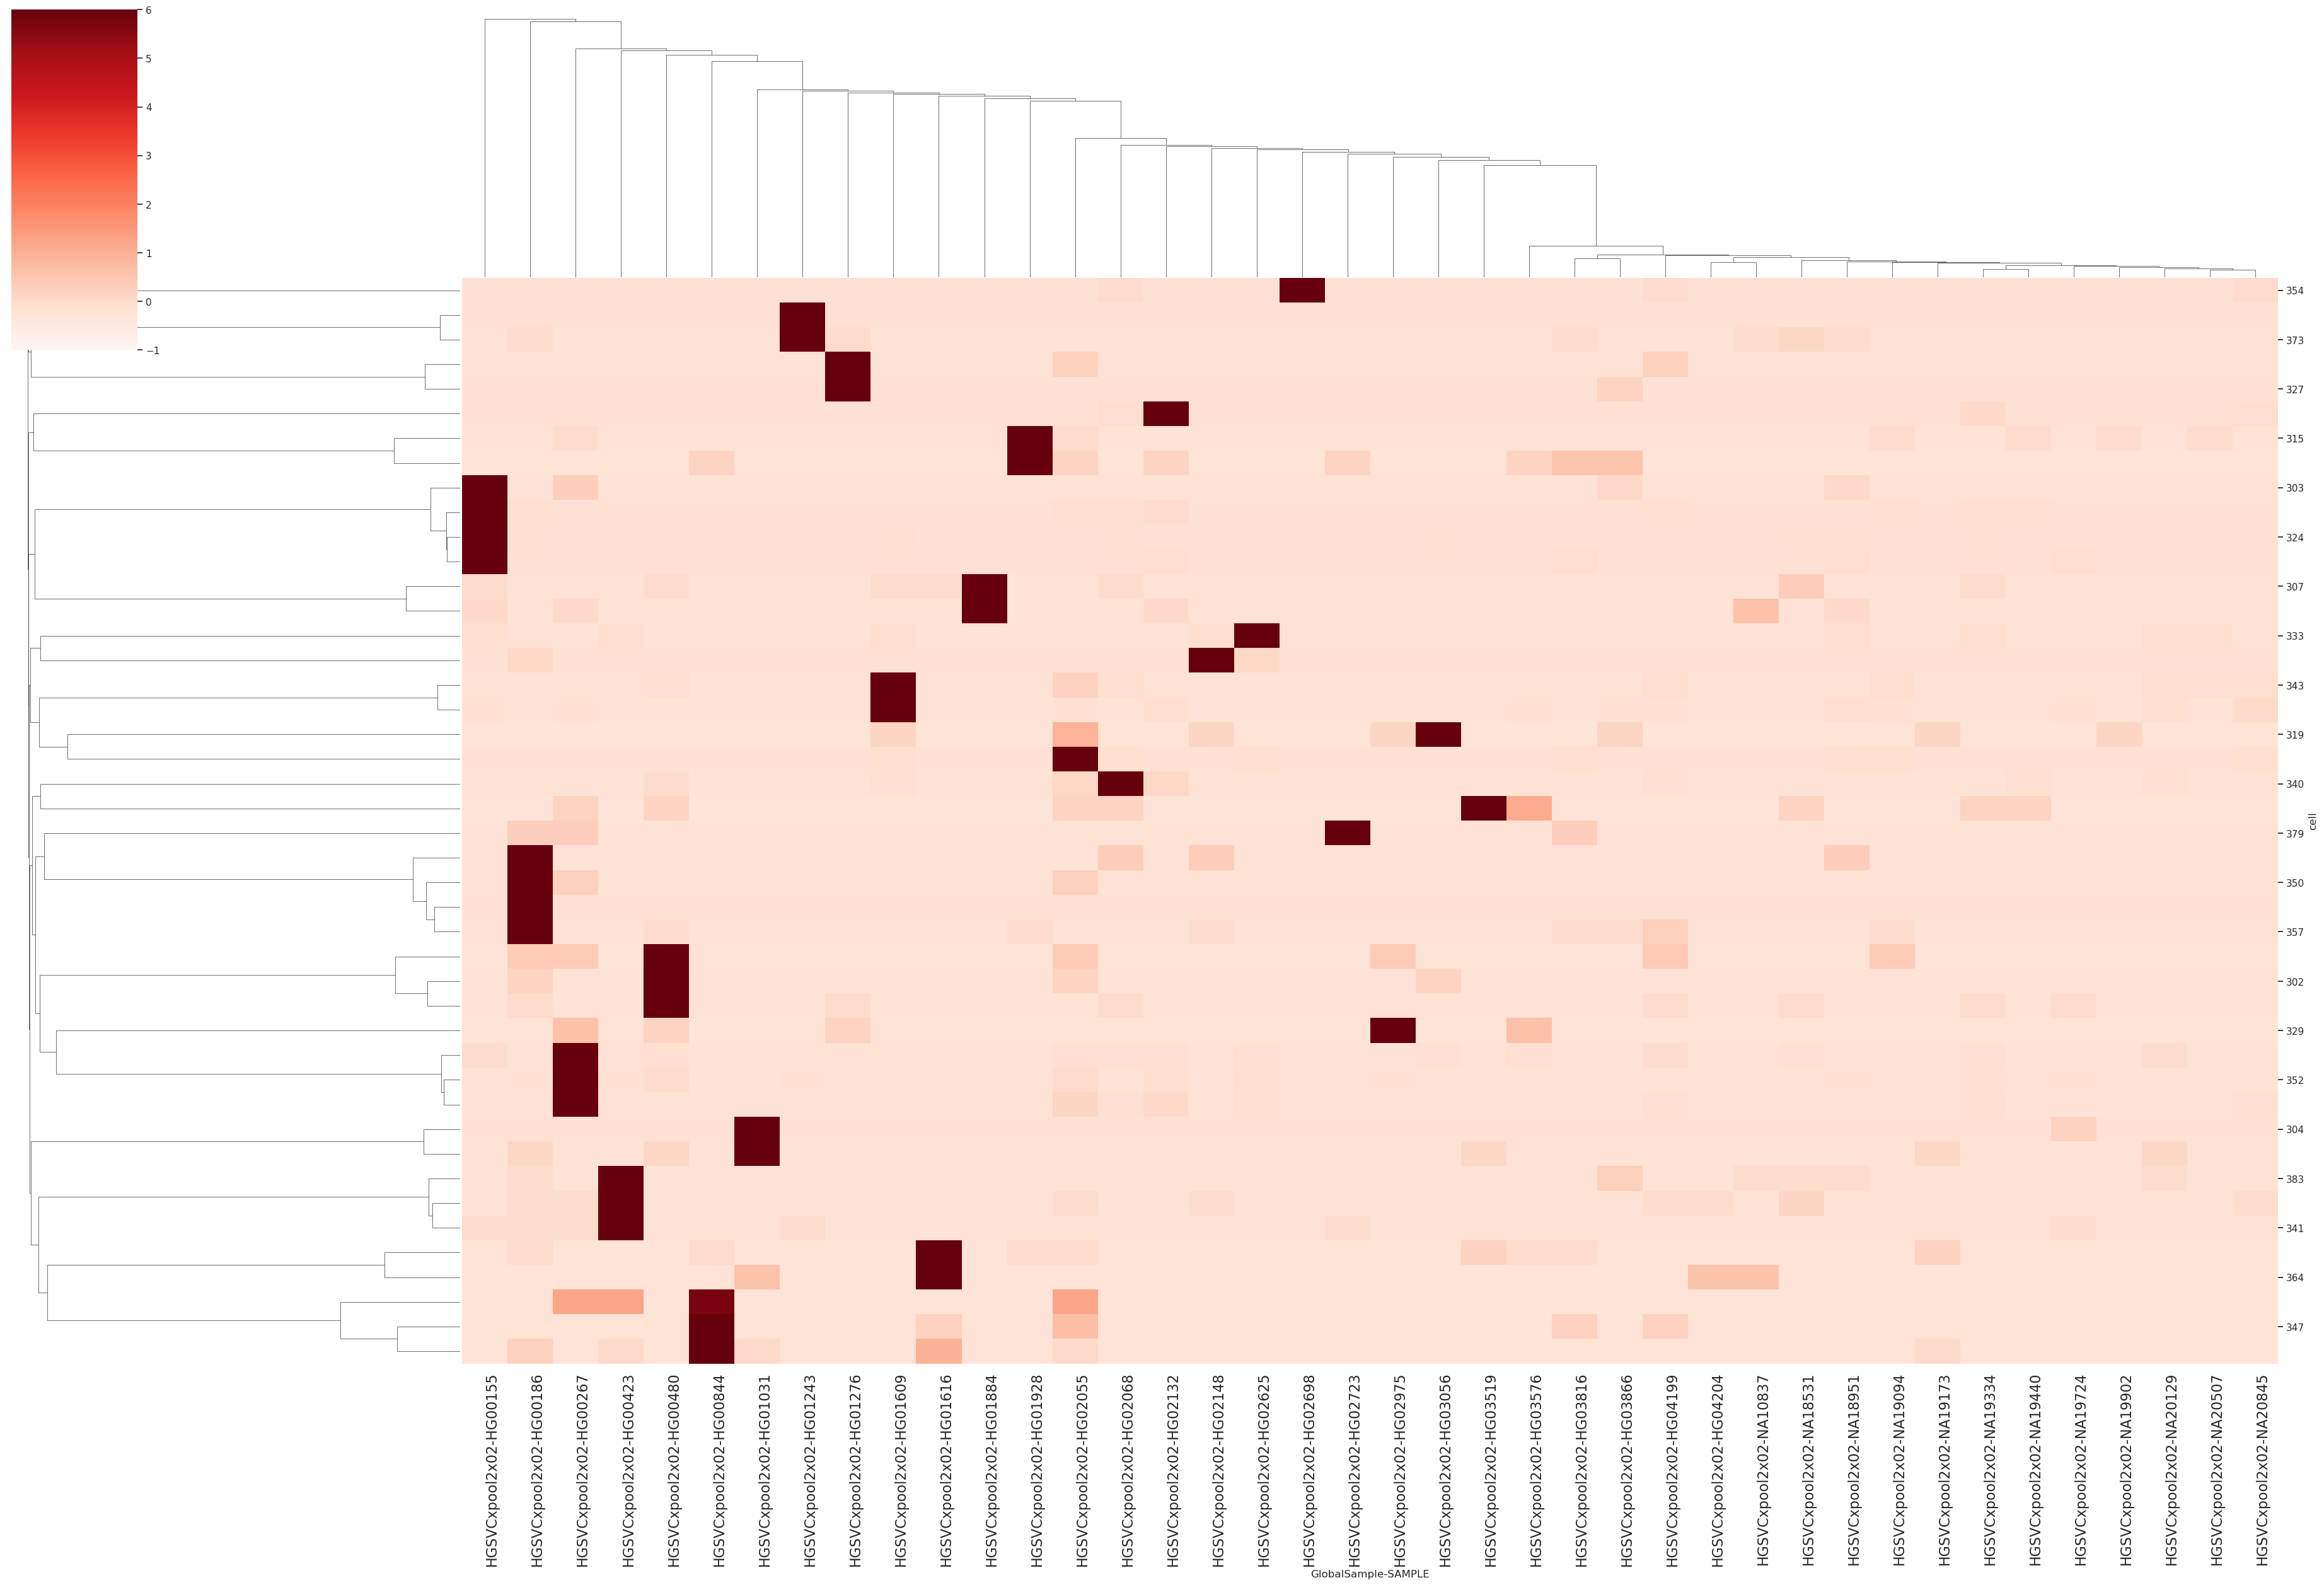

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# Assuming pivot_table_stats_zscore is your data

# Create the clustermap
ax = sns.clustermap(pivot_table_stats_zscore, cmap="Reds", vmin=-1, vmax=6)

# Set the size of the figure
width, height = 40, 30  # You can adjust these values as needed
ax.fig.set_size_inches(width, height)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor", fontsize=10)  # Adjust fontsize as needed

# Get the number of labels (assuming they are the same as the number of columns in your data)
num_labels = pivot_table_stats_zscore.shape[1]

# Set the x-tick labels manually
ax.ax_heatmap.set_xticks([x+0.5 for x in range(num_labels)])
ax.ax_heatmap.set_xticklabels(["-".join(e) for e in pivot_table_stats_zscore.columns], rotation=90,  ha='right', rotation_mode='anchor', fontsize=16 )
print(ax.ax_heatmap.get_xticklabels())

# Save the figure
output_file = f"{output_dir}/{sample}/clustermap_zscore_cell_per_sample.png"
#ax.savefig(output_file)

#ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
#ax.set_xlabel("Sample")
#ax.set_ylabel("Cell Line")
ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/clustermap_zscore_cell_per_sample.png")
ax

In [28]:
pivot_table_stats_zscore_no_mi =  pivot_table_stats_zscore.copy()
pivot_table_stats_zscore_no_mi.columns = ["-".join(e) for e in pivot_table_stats_zscore.columns.tolist()]
pivot_table_stats_zscore_no_mi

,HGSVCxpool2x02-HG00155,HGSVCxpool2x02-HG00186,HGSVCxpool2x02-HG00267,HGSVCxpool2x02-HG00423,HGSVCxpool2x02-HG00480,HGSVCxpool2x02-HG00844,HGSVCxpool2x02-HG01031,HGSVCxpool2x02-HG01243,HGSVCxpool2x02-HG01276,HGSVCxpool2x02-HG01609,HGSVCxpool2x02-HG01616,HGSVCxpool2x02-HG01884,HGSVCxpool2x02-HG01928,HGSVCxpool2x02-HG02055,HGSVCxpool2x02-HG02068,HGSVCxpool2x02-HG02132,HGSVCxpool2x02-HG02148,HGSVCxpool2x02-HG02625,HGSVCxpool2x02-HG02698,HGSVCxpool2x02-HG02723,HGSVCxpool2x02-HG02975,HGSVCxpool2x02-HG03056,HGSVCxpool2x02-HG03519,HGSVCxpool2x02-HG03576,HGSVCxpool2x02-HG03816,HGSVCxpool2x02-HG03866,HGSVCxpool2x02-HG04199,HGSVCxpool2x02-HG04204,HGSVCxpool2x02-NA10837,HGSVCxpool2x02-NA18531,HGSVCxpool2x02-NA18951,HGSVCxpool2x02-NA19094,HGSVCxpool2x02-NA19173,HGSVCxpool2x02-NA19334,HGSVCxpool2x02-NA19440,HGSVCxpool2x02-NA19724,HGSVCxpool2x02-NA19902,HGSVCxpool2x02-NA20129,HGSVCxpool2x02-NA20507,HGSVCxpool2x02-NA20845
cell,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
302,6.220377,0.151717,0.151717,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,0.151717,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431
303,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,0.307845,6.218476,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,0.061569,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,0.061569,-0.184707
304,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,0.230104,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,6.232805,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077
307,-0.022268,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,6.212899,-0.200416,-0.022268,-0.022268,-0.200416,-0.200416,-0.022268,-0.200416,-0.200416,-0.022268,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.022268,-0.200416,-0.200416,0.334027
308,-0.160128,6.244998,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128
312,-0.196727,-0.036134,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,-0.036134,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,6.227008,-0.196727,-0.196727,-0.196727,-0.036134,-0.196727,-0.036134,-0.196727,-0.036134,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,-0.036134,-0.036134,-0.196727,-0.196727,-0.196727,-0.196727,0.124460
315,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.008916,-0.008916,-0.187239,-0.008916,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.008916,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.187239,-0.008916,6.232383,-0.187239,-0.008916,-0.187239,-0.187239
319,-0.247355,-0.247355,6.084935,-0.247355,-0.247355,0.148413,-0.247355,-0.247355,0.148413,-0.247355,-0.247355,-0.247355,-0.247355,-0.247355,-0.247355,-0.247355,-0.247355,-0.247355,-0.247355,-0.247355,0.148413,-0.247355,-0

In [29]:
melt_pivot_table_stats_zscore = pd.melt(
    pivot_table_stats_zscore_no_mi.reset_index(), id_vars=["cell"], value_vars=["-".join(e) for e in pivot_table_stats_zscore.columns.tolist()]
)

In [30]:
combine_ashleys_mc_stats["cell"] = combine_ashleys_mc_stats["cell"].apply(lambda r: r.split(index)[1])
combine_ashleys_mc_stats.head()

,cell,prediction,probability,sample,medbin,mapped,suppl,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam
0,301,0,0.0240,HGSVCxpool2x02,4,383491,130,220196,19442,71670,72053,1,0.0697,0.372636,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
1,302,1,0.9122,HGSVCxpool2x02,21,1977033,1349,1224971,119674,314524,316515,1,0.0697,1.627260,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
2,303,1,0.6041,HGSVCxpool2x02,7,690007,302,420210,33716,117458,118321,1,0.0697,0.612760,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
3,304,1,0.7598,HGSVCxpool2x02,19,1725788,801,1068702,91867,281302,283116,1,0.0697,1.460790,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...
4,305,0,0.0000,HGSVCxpool2x02,0,44178,24,27298,1895,7468,7493,0,0.0000,0.000000,0.0,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-08-03...


In [31]:
gb_sample_count_stats[["cell", "GlobalSample", "SAMPLE", "ID"]].rename(columns={"GlobalSample" : "Pool", "SAMPLE" : "1KG_identified_sample", "ID": "SNP_nb"}).head()

,cell,Pool,1KG_identified_sample,SNP_nb
2,302,HGSVCxpool2x02,HG00155,19
3,302,HGSVCxpool2x02,HG00186,1
4,302,HGSVCxpool2x02,HG00267,1
5,302,HGSVCxpool2x02,NA19440,1
6,303,HGSVCxpool2x02,HG03519,2


In [32]:
gb_sample_count_stats[["cell", "GlobalSample", "SAMPLE", "ID"]].rename(columns={"GlobalSample" : "Pool", "SAMPLE" : "1KG_identified_sample", "ID": "SNP_nb"}).head()

,cell,Pool,1KG_identified_sample,SNP_nb
2,302,HGSVCxpool2x02,HG00155,19
3,302,HGSVCxpool2x02,HG00186,1
4,302,HGSVCxpool2x02,HG00267,1
5,302,HGSVCxpool2x02,NA19440,1
6,303,HGSVCxpool2x02,HG03519,2


In [33]:
predictions_to_export = melt_pivot_table_stats_zscore.groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)
predictions_to_export.loc[predictions_to_export["value"] < 5, "Trustable"] = False
predictions_to_export.loc[predictions_to_export["value"] >= 5, "Trustable"] = True
predictions_to_export[["GlobalSample", "SampleID"]] = predictions_to_export["variable"].str.split("-", expand=True)
predictions_to_export = predictions_to_export.rename(columns={"value": "z-score_value", "GlobalSample" : "Pool", "SampleID" : "1KG_identified_sample"}).drop("variable", axis=1)
predictions_to_export = pd.merge(predictions_to_export, gb_sample_count_stats[["cell", "GlobalSample", "SAMPLE", "ID"]].rename(columns={"GlobalSample" : "Pool", "SAMPLE" : "1KG_identified_sample", "ID": "SNP_nb"}), on=["cell", "Pool", "1KG_identified_sample"])
predictions_to_export = predictions_to_export[["cell", "Pool", "1KG_identified_sample", "z-score_value", "SNP_nb", "Trustable"]]
predictions_to_export.to_excel(f"{output_dir}/{sample_for_savedir}/{sample}_predictions_lite.xlsx", index=False)
predictions_to_export_lite = predictions_to_export.copy()
predictions_to_export = pd.merge(predictions_to_export, combine_ashleys_mc_stats, on="cell")
# Create tuples for MultiIndex
multiindex_columns = [('demultiplexing predictions', col) if col in predictions_to_export_lite.columns else ('metrics', col) for col in predictions_to_export.columns]
predictions_to_export_merge = predictions_to_export.copy()
# Assign MultiIndex to the columns of the merged DataFrame
predictions_to_export_merge.columns = pd.MultiIndex.from_tuples(multiindex_columns)

predictions_to_export_merge.set_index(("demultiplexing predictions", "cell")).to_excel(f"{output_dir}/{sample_for_savedir}/{sample}_predictions_with_metrics.xlsx", index=True)
predictions_to_export_merge

/tmp/ipykernel_1292046/58075166.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  predictions_to_export = melt_pivot_table_stats_zscore.groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)


demultiplexing predictions                                        \
                         cell            Pool 1KG_identified_sample   
0                         302  HGSVCxpool2x02               HG00155   
1                         303  HGSVCxpool2x02               HG03576   
2                         304  HGSVCxpool2x02               HG04204   
3                         307  HGSVCxpool2x02               HG02068   
4                         308  HGSVCxpool2x02               HG00186   
5                         312  HGSVCxpool2x02               HG02698   
6                         315  HGSVCxpool2x02               NA19724   
7                         319  HGSVCxpool2x02               HG00267   
8                         322  HGSVCxpool2x02               HG04204   
9                         323  HGSVCxpool2x02               HG02068   
10                        324  HGSVCxpool2x02               HG03576   
11                        325  HGSVCxpool2x02               HG03866   
12                        326  HGSVCxpool2x02               HG03576   
13                        327  HGSVCxpool2x02               HG03866   
14                        329  HGSVCxpool2x02               NA10837   
15                        330  HGSVCxpool2x02               HG01609   
16                        333  HGSVCxpool2x02               HG03056   
17                        337  HGSVCxpool2x02               HG02148   
18                        340  HGSVCxpool2x02               NA19902   
19                        341  HGSVCxpool2x02               HG02698   
20                        342  HGSVCxpool2x02               HG03576   
21                        343  HGSVCxpool2x02               HG02975   
22                        345  HGSVCxpool2x02               HG00155   
23                        347  HGSVCxpool2x02               HG01928   
24                        348  HGSVCxpool2x02               HG01928   
25                        350  HGSVCxpool2x02               HG00186   
26                        352  HGSVCxpool2x02               HG03519   
27                        353  HGSVCxpool2x02               HG02723   
28                        354  HGSVCxpool2x02               HG02132   
29                        356  HGSVCxpool2x02               HG03519   
30                        357  HGSVCxpool2x02               HG00186   
31                        358  HGSVCxpool2x02               HG02975   
32                        362  HGSVCxpool2x02               NA19440   
33                        364  HGSVCxpool2x02               HG02148   
34                        368  HGSVCxpool2x02               HG00186   
35                        370  HGSVCxpool2x02               HG03519   
36                        371  HGSVCxpool2x02               NA19724   
37                        372  HGSVCxpool2x02               HG01928   
38                        373  HGSVCxpool2x02               HG01609   
39                        377  HGSVCxpool2x02               HG00155   
40                        379  HGSVCxpool2x02               HG00480   
41                        383  HGSVCxpool2x02               HG02698   
42                        387  HGSVCxpool2x02               HG00423   
43                        392  HGSVCxpool2x02               HG03816   

                                     metrics                              \
   z-score_value SNP_nb Trustable prediction probability          sample   
0       6.220377     19      True          1      0.9122  HGSVCxpool2x02   
1       6.218476     26      True          1      0.6041  HGSVCxpool2x02   
2       6.232805     32      True          1      0.7598  HGSVCxpool2x02   
3       6.212899     36      True          1      0.7541  HGSVCxpool2x02   
4       6.244998      9      True          1      0.8264  HGSVCxpool2x02   
5       6.227008     40      True          1      0.9112  HGSVCxpool2x02   
6       6.232383     36      True          1      0.9165  HGSVCxpool2x02   
7       6.084935     16      True          1      0.

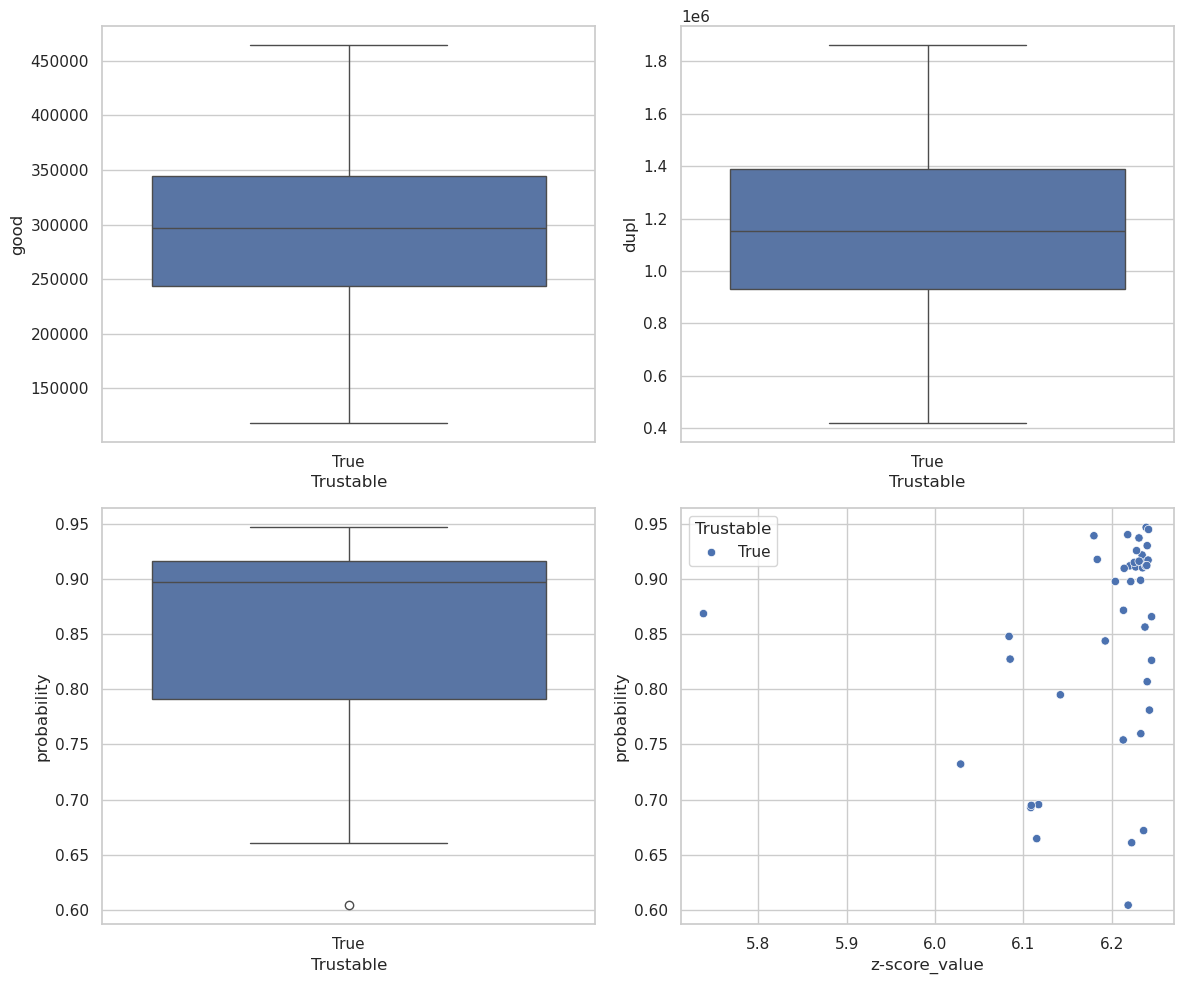

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a figure with 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plotting
sns.boxplot(data=predictions_to_export, x="Trustable", y="good", ax=axs[0, 0])
sns.boxplot(data=predictions_to_export, x="Trustable", y="dupl", ax=axs[0, 1])
sns.boxplot(data=predictions_to_export, x="Trustable", y="probability", ax=axs[1, 0])
sns.scatterplot(data=predictions_to_export, x="z-score_value", y="probability", hue="Trustable", ax=axs[1, 1])

# Adjust layout for better presentation
plt.tight_layout()

# Save the figure
plt.savefig(f"{output_dir}/{sample_for_savedir}/combined_plots_with_metrics.png")

# Show the plot
plt.show()


In [35]:
metadata = pd.read_csv("../20130606_g1k_3202_samples_ped_population.txt", sep=" ")
metadata.head()

,FamilyID,SampleID,FatherID,MotherID,Sex,Population,Superpopulation
0,HG00096,HG00096,0,0,1,GBR,EUR
1,HG00097,HG00097,0,0,2,GBR,EUR
2,HG00099,HG00099,0,0,2,GBR,EUR
3,HG00100,HG00100,0,0,2,GBR,EUR
4,HG00101,HG00101,0,0,1,GBR,EUR


In [36]:
#color_dict

/tmp/ipykernel_1292046/1381231664.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  melt_pivot_table_stats_zscore = melt_pivot_table_stats_zscore.loc[~melt_pivot_table_stats_zscore["variable"].str.contains("Random")].groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)


/tmp/ipykernel_1292046/1381231664.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)


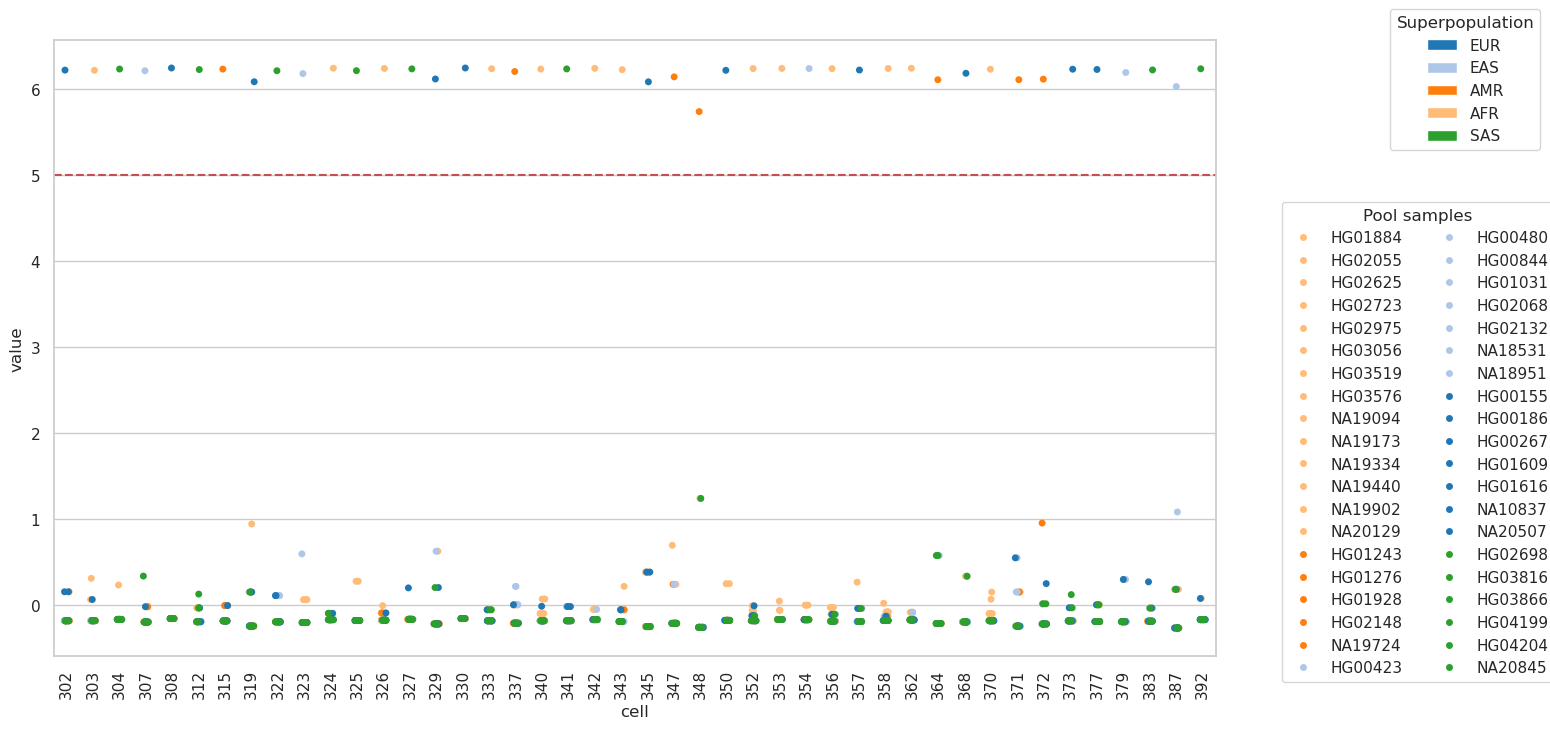

In [37]:
from matplotlib.patches import Patch


melt_pivot_table_stats_zscore = pd.melt(
    pivot_table_stats_zscore_no_mi.reset_index(), id_vars=["cell"], value_vars=["-".join(e) for e in pivot_table_stats_zscore.columns.tolist()]
)

melt_pivot_table_stats_zscore_tmp = melt_pivot_table_stats_zscore.loc[~melt_pivot_table_stats_zscore["variable"].str.contains("Random")]
melt_pivot_table_stats_zscore = melt_pivot_table_stats_zscore.loc[~melt_pivot_table_stats_zscore["variable"].str.contains("Random")].groupby(["cell"]).apply(lambda r: r.nlargest(1, 'value')).reset_index(drop=True)
# Assuming melt_pivot_table_stats_zscore is already defined and has the 'value' column.

# Calculate the numbers
total_points = len(melt_pivot_table_stats_zscore)
points_above_5 = melt_pivot_table_stats_zscore[(melt_pivot_table_stats_zscore['value'] > 5) & (~melt_pivot_table_stats_zscore["variable"].str.contains("Random"))].shape[0]
points_above_6 = melt_pivot_table_stats_zscore[(melt_pivot_table_stats_zscore['value'] > 6) & (~melt_pivot_table_stats_zscore["variable"].str.contains("Random"))].shape[0]
points_above_4 = melt_pivot_table_stats_zscore[(melt_pivot_table_stats_zscore['value'] > 4) & (~melt_pivot_table_stats_zscore["variable"].str.contains("Random"))].shape[0]
#melt_pivot_table_stats_zscore["variable"] = melt_pivot_table_stats_zscore["variable"].str.replace(sample_for_savedir.split("--")[1], "").str.replace("-", "")



melt_pivot_table_stats_zscore_tmp["SampleID"] = melt_pivot_table_stats_zscore_tmp["variable"].str.replace(sample_for_savedir.split("--")[1], "").str.replace("-", "")

melt_pivot_table_stats_zscore_tmp = pd.merge(melt_pivot_table_stats_zscore_tmp, metadata[["SampleID", "Superpopulation"]], on="SampleID")
# Generate a list of colors
colors = plt.cm.tab20.colors[:len(metadata.Superpopulation.unique().tolist())]

unique_superpopulations = melt_pivot_table_stats_zscore_tmp['Superpopulation'].unique()

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Add a color column to the dataframe
melt_pivot_table_stats_zscore_tmp['color'] = melt_pivot_table_stats_zscore_tmp['Superpopulation'].map(color_dict)

melt_pivot_table_stats_zscore_tmp = melt_pivot_table_stats_zscore_tmp.sort_values(by=["Superpopulation", "SampleID"])

palette_tmp = melt_pivot_table_stats_zscore_tmp[["SampleID", "color"]].drop_duplicates().set_index('SampleID')["color"].to_dict()


# Plotting
plt.figure(figsize=(15,8))
ax = sns.stripplot(data=melt_pivot_table_stats_zscore_tmp, x="cell", y="value", hue="SampleID", palette=palette_tmp)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.axhline(5, ls="--", lw=1.5, color="r")

# Add text box for the summary
textstr = '\n'.join((
    f'Total : {total_points}',
    f' > 4: {points_above_4}',
    f' > 5: {points_above_5}',
    f' > 6: {points_above_6}'))
props = dict(boxstyle='round', facecolor='grey', alpha=0.5)
#ax.text(0.5, 0.6, textstr, transform=ax.transAxes, fontsize=18,
#        verticalalignment='top', bbox=props)


# Create legend handles for superpopulations
#superpop_handles = [Patch(facecolor=color_dict[pop], label=pop) for pop in unique_superpopulations]
#superpop_legend = ax.legend(handles=superpop_handles, title="Superpopulation", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.add_artist(superpop_legend)

# Get handles and labels for SampleID
#handles, labels = ax.get_legend_handles_labels()

# Assuming there's a large number of labels, you might want to limit or organize these differently
# Here's a basic approach to re-adding the SampleID legend
# This step could be customized based on the number of samples and desired appearance
#sample_legend = ax.legend(handles[:len(unique_superpopulations)], labels[:len(unique_superpopulations)], title="SampleID", bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)


# Create legend handles for superpopulations
#legend_handles = [Patch(facecolor=color_dict[pop], label=pop) for pop in unique_superpopulations]

# First legend for SampleID - this is automatically added by seaborn, so we get it and set again
#h, l = ax.get_legend_handles_labels()
#first_legend = ax.legend(h, l, bbox_to_anchor=(1.025, 1), loc='upper left', ncol=3, title="Sample")
#plt.gca().add_artist(first_legend)
#
## Second legend for superpopulations
#ax.legend(handles=legend_handles, bbox_to_anchor=(1.025, 0.5), loc='center left', title="Superpopulation")


#ax.set_ylim(2,6.3)
ax.figure.savefig(f"{output_dir}/{sample_for_savedir}/zscore_distribution.png")

# Step 1: Manually obtain handles and labels for the "Pool samples"
handles, labels = ax.get_legend_handles_labels()

# Step 2: Create the first legend for "Pool samples"
sample_legend = ax.legend(handles, labels, bbox_to_anchor=(1.05, 0.75), loc='upper left', ncol=2, title="Pool samples")

# Important: Add this first legend back as an artist to the axes
plt.gca().add_artist(sample_legend)

# Step 3: Create the second legend for "Superpopulation"
superpop_handles = [Patch(facecolor=color_dict[pop], label=pop) for pop in unique_superpopulations]
superpop_legend = ax.legend(handles=superpop_handles, title="Superpopulation", bbox_to_anchor=(1.15, 1.05), loc='upper left', borderaxespad=0.)

#plt.tight_layout()
plt.show()



In [38]:
mask = [col for col in pivot_table_stats_zscore.columns if col[0] != 'Random_for_sanity_check']

# Apply the mask to filter out unwanted columns
pivot_table_stats_zscore[mask].head()

GlobalSample HGSVCxpool2x02                                                    \
SAMPLE              HG00155   HG00186   HG00267   HG00423   HG00480   HG00844   
cell                                                                            
302                6.220377  0.151717  0.151717 -0.185431 -0.185431 -0.185431   
303               -0.184707 -0.184707 -0.184707 -0.184707 -0.184707 -0.184707   
304               -0.170077 -0.170077 -0.170077 -0.170077 -0.170077 -0.170077   
307               -0.022268 -0.200416 -0.200416 -0.200416 -0.200416 -0.200416   
308               -0.160128  6.244998 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                                              \
SAMPLE         HG01031   HG01243   HG01276   HG01609   HG01616   HG01884   
cell                                                                       
302          -0.185431 -0.185431 -0.185431 -0.185431 -0.185431 -0.185431   
303          -0.184707 -0.184707 -0.184707 -0.184707 -0.184707 -0.184707   
304          -0.170077 -0.170077 -0.170077 -0.170077 -0.170077 -0.170077   
307          -0.200416 -0.200416 -0.200416 -0.200416 -0.200416 -0.200416   
308          -0.160128 -0.160128 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                                              \
SAMPLE         HG01928   HG02055   HG02068   HG02132   HG02148   HG02625   
cell                                                                       
302          -0.185431 -0.185431 -0.185431 -0.185431 -0.185431 -0.185431   
303          -0.184707 -0.184707 -0.184707 -0.184707 -0.184707 -0.184707   
304          -0.170077  0.230104 -0.170077 -0.170077 -0.170077 -0.170077   
307          -0.200416 -0.200416  6.212899 -0.200416 -0.022268 -0.022268   
308          -0.160128 -0.160128 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                                              \
SAMPLE         HG02698   HG02723   HG02975   HG03056   HG03519   HG03576   
cell                                                                       
302          -0.185431 -0.185431 -0.185431 -0.185431 -0.185431 -0.185431   
303          -0.184707 -0.184707 -0.184707 -0.184707  0.307845  6.218476   
304          -0.170077 -0.170077 -0.170077 -0.170077 -0.170077 -0.170077   
307          -0.200416 -0.200416 -0.022268 -0.200416 -0.200416 -0.022268   
308          -0.160128 -0.160128 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                                              \
SAMPLE         HG03816   HG03866   HG04199   HG04204   NA10837   NA18531   
cell                                                                       
302          -0.185431 -0.185431 -0.185431 -0.185431 -0.185431 -0.185431   
303          -0.184707 -0.184707 -0.184707 -0.184707 -0.184707 -0.184707   
304          -0.170077 -0.170077 -0.170077  6.232805 -0.170077 -0.170077   
307          -0.200416 -0.200416 -0.200416 -0.200416 -0.200416 -0.200416   
308          -0.160128 -0.160128 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                                              \
SAMPLE         NA18951   NA19094   NA19173   NA19334   NA19440   NA19724   
cell                                                                       
302          -0.185431 -0.185431 -0.185431 -0.185431  0.151717 -0.185431   
303          -0.184707 -0.184707  0.061569 -0.184707 -0.184707 -0.184707   
304          -0.170077 -0.170077 -0.170077 -0.170077 -0.170077 -0.170077   
307          -0.200416 -0.200416 -0.200416 -0.200416 -0.200416 -0.200416   
308          -0.160128 -0.160128 -0.160128 -0.160128 -0.160128 -0.160128   

GlobalSample                                          
SAMPLE         NA19902   NA20129   NA20507   NA20845  
cell                                                  
302          -0.185431 -0.185431 -0.185431 -0.185431  
303          -0.184707 -0.184707  0.061569 -0.184707  
304          -0.170077 -0.17007

In [39]:
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore[mask].copy()
pivot_table_stats_zscore_wt_multiindex.columns = pivot_table_stats_zscore[mask].columns.droplevel()
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore_wt_multiindex.reset_index().rename({"index":"cell"}, axis=1)
pivot_table_stats_zscore_wt_multiindex.head()                   

SAMPLE,cell,HG00155,HG00186,HG00267,HG00423,HG00480,HG00844,HG01031,HG01243,HG01276,HG01609,HG01616,HG01884,HG01928,HG02055,HG02068,HG02132,HG02148,HG02625,HG02698,HG02723,HG02975,HG03056,HG03519,HG03576,HG03816,HG03866,HG04199,HG04204,NA10837,NA18531,NA18951,NA19094,NA19173,NA19334,NA19440,NA19724,NA19902,NA20129,NA20507,NA20845
0,302,6.220377,0.151717,0.151717,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,0.151717,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431
1,303,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,0.307845,6.218476,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,0.061569,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,0.061569,-0.184707
2,304,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,0.230104,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,6.232805,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077
3,307,-0.022268,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,6.212899,-0.200416,-0.022268,-0.022268,-0.200416,-0.200416,-0.022268,-0.200416,-0.200416,-0.022268,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.022268,-0.200416,-0.200416,0.334027
4,308,-0.160128,6.244998,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128


In [40]:
#pivot_table_stats_zscore.melt()
melt_df = pd.melt(pivot_table_stats_zscore_wt_multiindex, id_vars=['cell'], value_vars=[e for e in pivot_table_stats_zscore_wt_multiindex.columns if e not in ["cell"]])
melt_df.head()

,cell,SAMPLE,value
0,302,HG00155,6.220377
1,303,HG00155,-0.184707
2,304,HG00155,-0.170077
3,307,HG00155,-0.022268
4,308,HG00155,-0.160128


In [41]:
def top_n_samples(group, n=3):
    return group.sort_values(by='ID', ascending=False).head(n)


# tmp_debug = gb_sample_count_stats.loc[(gb_sample_count_stats["sample"] == "GM19836x01") & (gb_sample_count_stats["prediction"] == 1)].sort_values(by=["cell", "ID"], ascending=[True, False])
pd.options.display.max_rows = None
gb_sample_count_stats
tmp_debug = gb_sample_count_stats.groupby('cell').apply(top_n_samples, n=3).reset_index(drop=True)
tmp_debug = pd.merge(tmp_debug, melt_df, on=["cell", "SAMPLE"], how="inner")
tmp_debug[["cell", "SAMPLE", "ID", "value", "probability", "good"]]
tmp_debug.head(100)
tmp_debug.to_excel(f"{output_dir}/{sample_for_savedir}/debug.xlsx", index=False)

# # Generate a color for each unique cell
# unique_cells = tmp_debug['cell'].unique()
# colors = [f"background-color: rgb({200 + i*20 % 55}, {220 - (i*20) % 55}, {200 + (i*30) % 55})" for i in range(len(unique_cells))]
# color_map = dict(zip(unique_cells, colors))

# # Apply the colors
# def apply_row_colors(row):
#     return [color_map[row['cell']]] * len(row)

# styled_df = tmp_debug.drop(["bam"], axis=1).style.apply(apply_row_colors, axis=1)

# # Display the styled DataFrame in Jupyter Notebook
# styled_df


/tmp/ipykernel_1292046/2913691368.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp_debug = gb_sample_count_stats.groupby('cell').apply(top_n_samples, n=3).reset_index(drop=True)


In [42]:
tmp_debug.SAMPLE.nunique()

39

In [43]:

# Rpy2

%load_ext rpy2.ipython 


In [44]:
metadata = pd.read_csv("../20130606_g1k_3202_samples_ped_population.txt", sep=" ")
metadata.head()

,FamilyID,SampleID,FatherID,MotherID,Sex,Population,Superpopulation
0,HG00096,HG00096,0,0,1,GBR,EUR
1,HG00097,HG00097,0,0,2,GBR,EUR
2,HG00099,HG00099,0,0,2,GBR,EUR
3,HG00100,HG00100,0,0,2,GBR,EUR
4,HG00101,HG00101,0,0,1,GBR,EUR


In [45]:
#melt_pivot_table_stats_zscore

In [46]:
melt_pivot_table_stats_zscore.head()
melt_pivot_table_stats_zscore[["GlobalSample", "SampleID"]] = melt_pivot_table_stats_zscore.variable.str.split("-", expand=True)
melt_pivot_table_stats_zscore.head()

,cell,variable,value,GlobalSample,SampleID
0,302,HGSVCxpool2x02-HG00155,6.220377,HGSVCxpool2x02,HG00155
1,303,HGSVCxpool2x02-HG03576,6.218476,HGSVCxpool2x02,HG03576
2,304,HGSVCxpool2x02-HG04204,6.232805,HGSVCxpool2x02,HG04204
3,307,HGSVCxpool2x02-HG02068,6.212899,HGSVCxpool2x02,HG02068
4,308,HGSVCxpool2x02-HG00186,6.244998,HGSVCxpool2x02,HG00186


In [47]:
merge_melt_pivot_table_stats_zscore = pd.merge(melt_pivot_table_stats_zscore, metadata, on="SampleID")
merge_melt_pivot_table_stats_zscore.head()


,cell,variable,value,GlobalSample,SampleID,FamilyID,FatherID,MotherID,Sex,Population,Superpopulation
0,302,HGSVCxpool2x02-HG00155,6.220377,HGSVCxpool2x02,HG00155,GBR001,0,HG00144,1,GBR,EUR
1,303,HGSVCxpool2x02-HG03576,6.218476,HGSVCxpool2x02,HG03576,SL71,HG03574,HG03575,2,MSL,AFR
2,304,HGSVCxpool2x02-HG04204,6.232805,HGSVCxpool2x02,HG04204,ST006,HG03679,HG03642,1,STU,SAS
3,307,HGSVCxpool2x02-HG02068,6.212899,HGSVCxpool2x02,HG02068,VN064,HG02070,HG02069,2,KHV,EAS
4,308,HGSVCxpool2x02-HG00186,6.244998,HGSVCxpool2x02,HG00186,HG00186,0,0,1,FIN,EUR


In [48]:
merge_melt_pivot_table_stats_zscore.SampleID.nunique()

23

In [49]:
import yaml
file_path = "pools_composition.yaml"
reference_sample_list = yaml.safe_load(open(file_path, "r"))

In [50]:
if not "NEW" in sample:
    corresponding_sample = [e for e in reference_sample_list if e in sample and "NEW" not in e][0]
else:
    corresponding_sample = [e for e in reference_sample_list if e in sample and "NEW" in e][0]

print(corresponding_sample)
reference_samples_with_metadata = pd.merge(
    pd.DataFrame([e.replace("GM", "NA") for e in reference_sample_list[corresponding_sample]], columns=[corresponding_sample]).melt().rename(columns={"variable":"Pool", "value":"SampleID"}),
    metadata,
    how='left'
)
reference_samples_with_metadata.head()

pool2


,Pool,SampleID,FamilyID,FatherID,MotherID,Sex,Population,Superpopulation
0,pool2,NA19094,Y040,NA19092,NA19093,2,YRI,AFR
1,pool2,NA19173,Y047,NA19171,NA19172,1,YRI,AFR
2,pool2,HG02055,BB15,HG02053,HG02054,1,ACB,AFR
3,pool2,HG01884,BB03,HG01885,HG01956,2,ACB,AFR
4,pool2,NA20129,2433,NA19920,NA19921,2,ASW,AFR


{'NA18531', 'HG00155', 'HG00423', 'HG02625', 'HG00844', 'HG00186', 'HG02132', 'HG04199', 'HG02698', 'HG03519', 'HG01928', 'NA20845', 'NA19094', 'HG02148', 'HG03866', 'HG01031', 'HG02975', 'NA10837', 'NA19724', 'NA19902', 'HG01609', 'HG03816', 'HG04204', 'HG00267', 'NA19440', 'HG01884', 'NA18951', 'HG03576', 'NA19173', 'NA20129', 'HG01616', 'HG02723', 'HG01243', 'NA19334', 'HG03056', 'HG00480', 'HG02055', 'NA20507', 'HG01276', 'HG02068'}
{'HG00155', 'HG00423', 'HG00186', 'HG02132', 'HG02698', 'HG03519', 'HG01928', 'HG02148', 'HG03866', 'HG02975', 'NA10837', 'NA19724', 'NA19902', 'HG01609', 'HG03816', 'HG00267', 'HG04204', 'NA19440', 'HG03576', 'HG02723', 'HG03056', 'HG00480', 'HG02068'}
{'NA18531', 'HG01884', 'NA20845', 'NA19094', 'NA18951', 'HG01276', 'HG02625', 'HG00844', 'NA19173', 'NA20129', 'HG01616', 'HG01243', 'NA19334', 'HG04199', 'HG01031', 'NA20507', 'HG02055'}


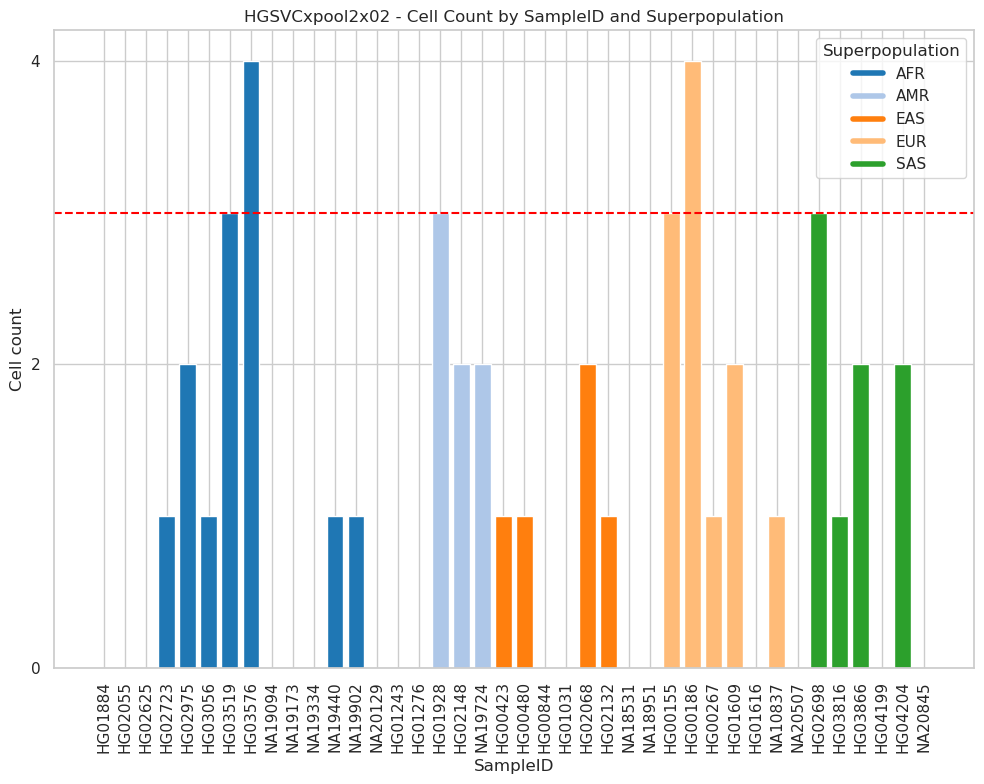

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merge_melt_pivot_table_stats_zscore is a DataFrame that contains the data you've shown.

df = merge_melt_pivot_table_stats_zscore.groupby(["Superpopulation", "SampleID"])["cell"].nunique().reset_index()


# First, find all unique SampleIDs from reference_samples_with_metadata
unique_ref_sample_ids = reference_samples_with_metadata['SampleID'].unique()

# Identify missing SampleIDs in df
missing_sample_ids = set(unique_ref_sample_ids).difference(set(df['SampleID'].unique().tolist()))


print(set(unique_ref_sample_ids))
print(set(df['SampleID'].unique().tolist()))
print(missing_sample_ids)


# For each missing SampleID, find its Superpopulation from reference_samples_with_metadata and add a row to df
for sample_id in missing_sample_ids:
    superpop = reference_samples_with_metadata.loc[reference_samples_with_metadata['SampleID'] == sample_id, 'Superpopulation'].values[0]
    # Add a new row to df for the missing SampleID
    # Assuming 'cell' count should be 0 (or another placeholder value) for missing SampleID
    df = pd.concat([df, pd.DataFrame({'Superpopulation': [superpop], 'SampleID': [sample_id], 'cell': [0]})], ignore_index=True)
    df = df.loc[~df["SampleID"].isin(["HG01453", "HG04128"])]


# Unique superpopulations for color mapping
unique_superpopulations = df['Superpopulation'].unique()

# Generate a list of colors
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Add a color column to the dataframe
df['color'] = df['Superpopulation'].map(color_dict)

df = df.sort_values(by=["Superpopulation", "SampleID"])


df.to_csv(f"{output_dir}/{sample_for_savedir}/cell_count_by_sample_and_superpop_DATA.csv", index=False, sep="\t")

# Plot
plt.figure(figsize=(10, 8))
for _, row in df.iterrows():
    plt.bar(row['SampleID'], row['cell'], color=row['color'], label=row['Superpopulation'])

plt.axhline(3, ls="--", color="red")
# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=color_dict[sp], lw=4, label=sp) for sp in unique_superpopulations]
plt.legend(handles=legend_elements, title='Superpopulation')

plt.xlabel('SampleID')
plt.ylabel('Cell count')
plt.xticks(rotation=90)  # Rotate the x labels so they don't overlap
plt.title(f'{sample_for_savedir_lite} - Cell Count by SampleID and Superpopulation')

import matplotlib
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().yaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.savefig(f"{output_dir}/{sample_for_savedir}/cell_count_by_sample_and_superpop.png")

plt.show()


/tmp/ipykernel_1292046/3277955254.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reference_samples_with_metadata.Superpopulation.value_counts().reset_index().sort_values(by="Superpopulation"), x="Superpopulation", y="count", palette=palette, alpha=0.3, label='Expected Count')
/tmp/ipykernel_1292046/3277955254.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x="Superpopulation", y="SampleID", palette=palette)


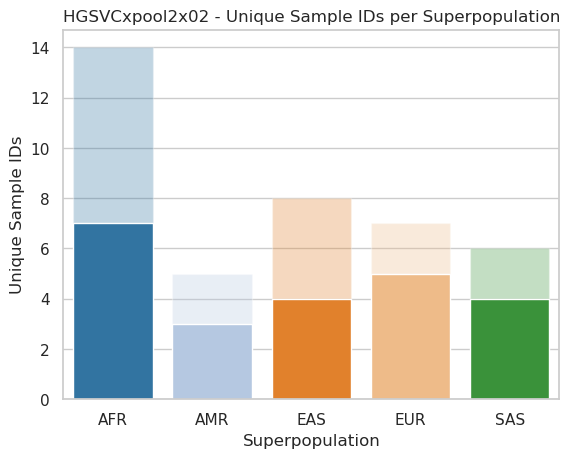

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merge_melt_pivot_table_stats_zscore is your DataFrame
grouped_data = merge_melt_pivot_table_stats_zscore.groupby("Superpopulation")["SampleID"].nunique().reset_index()

# Unique superpopulations for color mapping
unique_superpopulations = grouped_data['Superpopulation'].unique()

# Generate a list of colors
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]

# Create a color dictionary
color_dict = dict(zip(unique_superpopulations, colors))

# Create a color palette that Seaborn can use
palette = [color_dict[sp] for sp in grouped_data['Superpopulation']]


# Plot expected counts (background bars)
sns.barplot(data=reference_samples_with_metadata.Superpopulation.value_counts().reset_index().sort_values(by="Superpopulation"), x="Superpopulation", y="count", palette=palette, alpha=0.3, label='Expected Count')


df.to_csv(f"{output_dir}/{sample_for_savedir}/sample_by_superpop_recalled_DATA_background.csv", index=False, sep="\t")

sample_for_savedir_lite = sample_for_savedir.split("--")[1]
# Plot
sns.barplot(data=grouped_data, x="Superpopulation", y="SampleID", palette=palette)

plt.xlabel('Superpopulation')
plt.ylabel('Unique Sample IDs')
plt.title(f'{sample_for_savedir_lite} - Unique Sample IDs per Superpopulation')
plt.savefig(f"{output_dir}/{sample_for_savedir}/sample_by_superpop_recalled.png")

plt.show()


<Axes: xlabel='Population', ylabel='count'>

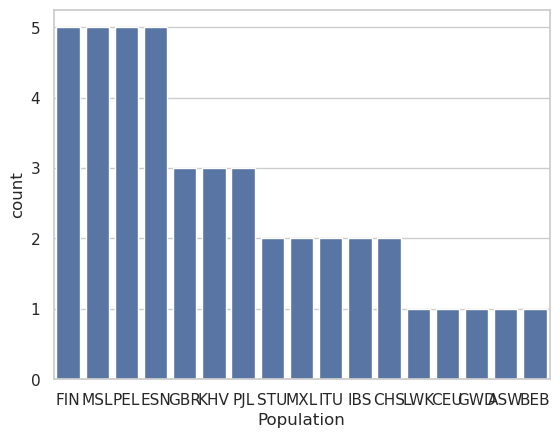

In [53]:
sns.barplot(data=merge_melt_pivot_table_stats_zscore.Population.value_counts().reset_index(), x="Population", y="count")

In [54]:
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore_wt_multiindex.set_index("cell")
pivot_table_stats_zscore_wt_multiindex.head()

SAMPLE,HG00155,HG00186,HG00267,HG00423,HG00480,HG00844,HG01031,HG01243,HG01276,HG01609,HG01616,HG01884,HG01928,HG02055,HG02068,HG02132,HG02148,HG02625,HG02698,HG02723,HG02975,HG03056,HG03519,HG03576,HG03816,HG03866,HG04199,HG04204,NA10837,NA18531,NA18951,NA19094,NA19173,NA19334,NA19440,NA19724,NA19902,NA20129,NA20507,NA20845
cell,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
302,6.220377,0.151717,0.151717,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431,0.151717,-0.185431,-0.185431,-0.185431,-0.185431,-0.185431
303,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,0.307845,6.218476,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,0.061569,-0.184707,-0.184707,-0.184707,-0.184707,-0.184707,0.061569,-0.184707
304,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,0.230104,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,6.232805,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077,-0.170077
307,-0.022268,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,6.212899,-0.200416,-0.022268,-0.022268,-0.200416,-0.200416,-0.022268,-0.200416,-0.200416,-0.022268,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.200416,-0.022268,-0.200416,-0.200416,0.334027
308,-0.160128,6.244998,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128,-0.160128


In [55]:
%%R -i output_dir -i sample_for_savedir -i pivot_table_stats_zscore_wt_multiindex -i metadata -i ref_count -w 1800 -h 1500
library(ComplexHeatmap)
library(circlize)

set.seed(123) # for reproducibility
ordered_metadata <- metadata[match(colnames(pivot_table_stats_zscore_wt_multiindex), metadata$SampleID), ]

# Map GlobalSample to the SAMPLE in pivot_table_stats_zscore
global_sample_annotation <- ref_count[match(colnames(pivot_table_stats_zscore_wt_multiindex), ref_count$SAMPLE), "GlobalSample"]


# Hex color codes provided by you
superpopulation_colors_hex <- c(
  "AFR" = "#3274A1",
  "AMR" = "#E1812C",
  "EAS" = "#EEBB89",
  "EUR" = "#B5C8E1",
  "SAS" = "#3A923A"
)

# Assuming ordered_metadata is your metadata dataframe which has a column 'Superpopulation'

# Check if all superpopulations in your data are covered by the colors defined
if(!all(unique(ordered_metadata$Superpopulation) %in% names(superpopulation_colors_hex))) {
  stop("Not all superpopulations have a defined color")
}

# Create HeatmapAnnotation objects with the new colors
col_annotation <- HeatmapAnnotation(
  df = ordered_metadata[c("Population", "Superpopulation")],
  col = list(
    Superpopulation = superpopulation_colors_hex  # Apply the color mapping
    # Add other annotations if necessary
  ),
  GlobalSample = global_sample_annotation  # Assuming global_sample_annotation is previously defined
)

# Convert the pandas DataFrame to an R matrix
mat <- as.matrix(pivot_table_stats_zscore_wt_multiindex)
#print(head(mat))

file_path <- paste(output_dir, sample_for_savedir, "clustermap_zscore_cell_per_sample_with_annotations.png", sep="/")
png(file_path, width = 1800, height = 1500)

# Creating the heatmap
Heatmap(mat, 
        name = "z-score", 
        col = colorRamp2(c(-1, 6), c("white", "red")),
        top_annotation = col_annotation,
        cluster_rows = TRUE, 
        cluster_columns = TRUE,
        show_row_names = TRUE,
        show_column_names = TRUE,
       row_names_gp = gpar(fontsize = 8)) # Adjust fontsize as needed

#dev.off()

R[write to console]: Loading required package: grid



R[write to console]: ========================================
ComplexHeatmap version 2.18.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




R[write to console]: ========================================
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


